In [1]:
!wget https://ndownloader.figshare.com/articles/1512427/versions/5


--2024-07-16 23:01:37--  https://ndownloader.figshare.com/articles/1512427/versions/5
Resolving ndownloader.figshare.com (ndownloader.figshare.com)... 34.255.157.218, 52.31.110.133, 52.31.177.101, ...
Connecting to ndownloader.figshare.com (ndownloader.figshare.com)|34.255.157.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 879501695 (839M) [application/zip]
Saving to: ‘5’

5                   100%[===================>] 838.76M  6.54MB/s    in 3m 47s  

2024-07-16 23:05:26 (3.69 MB/s) - ‘5’ saved [879501695/879501695]



In [2]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 889.5 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 783.5 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.9/152.9 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 kB 1.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 2.7 MB/s eta 0:00:00a 0:00:01
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21493 sha256=bf09f6b948d8edf12e43a99d96838d20159efbc7f2e05e18dfb67e66dcaa75e8
  Stored in directory: /home/tanmay/.cache/pip/wheels/54/aa/01/724885182f93150035a2a91bce34a12877e8067a97baaf5dc8
Successfully built promise
  Attempting uninstall: protobuf
    Found existing installation:

In [3]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

2024-07-16 23:06:35.029725: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 23:06:35.850101: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-16 23:06:35.854923: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-16 23:06:38.289352: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


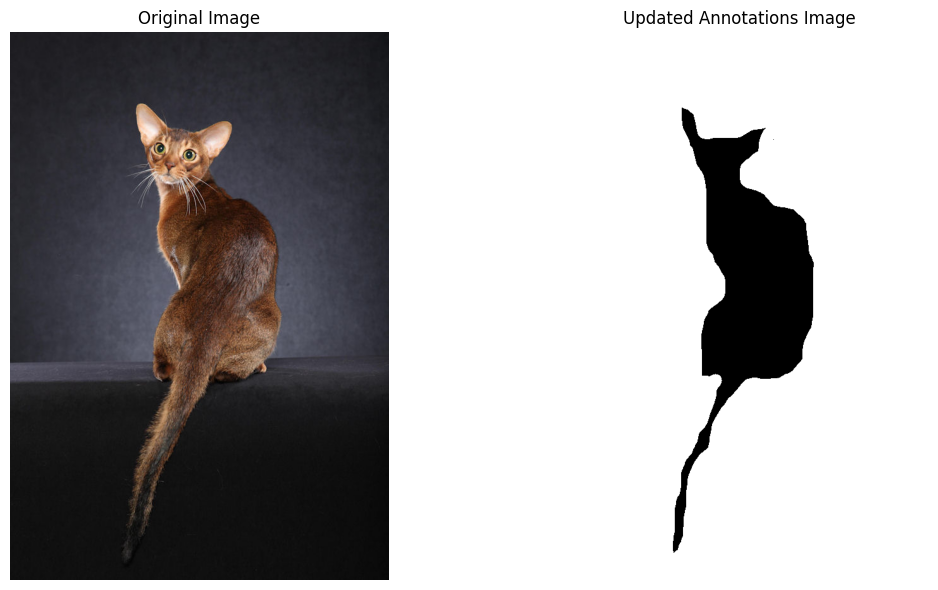

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the original image and the annotations image
original_image_path = 'images/Abyssinian_3.jpg'
annotations_image_path = 'trimap/annotations/trimaps/Abyssinian_3.png'

original_image = Image.open(original_image_path)
annotations_image = Image.open(annotations_image_path).convert('L')  # Convert to grayscale

# Convert to numpy array for easier manipulation
annotations_array = np.array(annotations_image)

# Replace all pixel values equal to 3 with 2
annotations_array[annotations_array == 3] = 2

# Convert back to Image
updated_annotations_image = Image.fromarray(annotations_array)

# Save the updated annotations image
updated_annotations_image.save('annotated2.png')

# Display the original and updated images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the updated annotations image
axes[1].imshow(updated_annotations_image, cmap='gray')
axes[1].set_title('Updated Annotations Image')
axes[1].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the original image and the annotations image
original_image_path = 'images/Abyssinian_3.jpg'
annotations_image_path = 'annotated2.png'

original_image = Image.open(original_image_path).convert('RGB')
annotations_image = Image.open(annotations_image_path).convert('L')  # Convert to grayscale

# Convert images to numpy arrays
original_array = np.array(original_image)
annotations_array = np.array(annotations_image)

# Flatten the images for Random Forest input
X = original_array.reshape(-1, 3)  # Features: RGB values
y = annotations_array.flatten()  # Labels: Multiclass classification (1, 2, or 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, min_samples_split=5, max_depth=7, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

KeyboardInterrupt: 

In [5]:
# Predict on the entire image
y_pred_full = rf_model.predict(X)

# Reshape the predictions back to the original image shape
predicted_segmentation = y_pred_full.reshape(annotations_array.shape)

cmap = {
    1: [255, 0, 0],  
    2: [0, 255, 0],    
    3: [0, 0, 255]    
}

# Create an RGB image based on the predictions
segmentation_rgb = np.zeros((predicted_segmentation.shape[0], predicted_segmentation.shape[1], 3), dtype=np.uint8)

for class_label, color in cmap.items():
    segmentation_rgb[predicted_segmentation == class_label] = color

# Visualize the original image, ground truth, and predicted segmentation
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the ground truth
axes[1].imshow(annotations_image, cmap='gray')
axes[1].set_title('Ground Truth')
axes[1].axis('off')

# Display the predicted segmentation
axes[2].imshow(segmentation_rgb)
axes[2].set_title('Predicted Segmentation')
axes[2].axis('off')

plt.tight_layout()
plt.show()

/home/tanmay/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:879: RuntimeWarning: invalid value encountered in divide
  proba /= len(self.estimators_)


AttributeError: 'list' object has no attribute 'take'

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define Union-Find data structure for tracking connected components
class UnionFind:
    def __init__(self, n):
        self.parent = list(range(n))
        self.rank = [0] * n
        self.min_point = [i for i in range(n)]

    def find(self, u):
        if self.parent[u] != u:
            self.parent[u] = self.find(self.parent[u])
        return self.parent[u]

    def union(self, u, v):
        root_u = self.find(u)
        root_v = self.find(v)
        if root_u != root_v:
            if self.rank[root_u] > self.rank[root_v]:
                self.parent[root_v] = root_u
            elif self.rank[root_u] < self.rank[root_v]:
                self.parent[root_u] = root_v
            else:
                self.parent[root_v] = root_u
                self.rank[root_u] += 1

    def find_min(self, u):
        return self.min_point[self.find(u)]

# Function to coy_pred_full_without_topompute critical pairs and robustness
def compute_topological_penalty(X, values):
    sorted_indices = np.argsort(values)
    sorted_points = X[sorted_indices]
    sorted_values = values[sorted_indices]

    uf = UnionFind(len(X))
    pairings_f = []

    for i, p in enumerate(sorted_points):
        u = sorted_indices[i]
        if i > 0:
            v = sorted_indices[i - 1]
            uf.union(u, v)
            min_v = uf.find_min(v)
            if sorted_values[min_v] <= 0 and sorted_values[u] >= 0:
                pairings_f.append((min_v, u))

    neg_values = -values
    neg_sorted_indices = np.argsort(neg_values)
    neg_sorted_points = X[neg_sorted_indices]
    neg_sorted_values = neg_values[neg_sorted_indices]

    uf_neg = UnionFind(len(X))
    pairings_neg_f = []

    for i, p in enumerate(neg_sorted_points):
        u = neg_sorted_indices[i]
        if i > 0:
            v = neg_sorted_indices[i - 1]
            uf_neg.union(u, v)
            min_v = uf_neg.find_min(v)
            if neg_sorted_values[min_v] <= 0 and neg_sorted_values[u] >= 0:
                pairings_neg_f.append((min_v, u))

    critical_pairs = pairings_f + pairings_neg_f

    valid_critical_pairs = [(p1, p2) for p1, p2 in critical_pairs if p1 < len(X) and p2 < len(X)]
    critical_values = [(values[p1], values[p2]) for p1, p2 in valid_critical_pairs]
    robustness = [min(abs(f_p1), abs(f_p2)) for f_p1, f_p2 in critical_values]

    return robustness

# Function to compute combined loss function with topological penalty
def combined_loss(clf, X, y, lambda_, robustness):
    clf.fit(X, y)
    decision_function = clf.predict(X)
    hinge_loss = np.sum(np.maximum(0, 1 - decision_function))
    topological_penalty = lambda_ * np.sum([r**2 for r in robustness])
    return hinge_loss + topological_penalty

# Function to perform gradient descent for combined loss function
def gradient_descent(clf, X, y, lambda_, robustness, learning_rate=0.01, num_iterations=100):
    for _ in range(num_iterations):
        loss = combined_loss(clf, X, y, lambda_, robustness)
        clf.fit(X, y)
    return clf

# Load the original image and the annotations image
original_image_path = 'images/Abyssinian_3.jpg'
annotations_image_path = 'annotated2.png'

original_image = Image.open(original_image_path).convert('RGB')
annotations_image = Image.open(annotations_image_path).convert('L')  

# Convert images to numpy arrays
original_array = np.array(original_image)
annotations_array = np.array(annotations_image)

# Flatten the images for Random Forest input
X = original_array.reshape(-1, 3) 
y = annotations_array.flatten()  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier without topological penalty
clf_no_penalty = RandomForestClassifier(n_estimators=100, min_samples_split=2, max_depth=5, random_state=42)
clf_no_penalty.fit(X_train, y_train)

# Predict on the test set without penalty
y_pred_no_penalty = clf_no_penalty.predict(X_test)
accuracy_no_penalty = accuracy_score(y_test, y_pred_no_penalty)
print(f'Accuracy without topological penalty: {accuracy_no_penalty:.2f}')

# Compute decision function values for Random Forest (if needed)
values = clf_no_penalty.predict_proba(X)[:, 1]  # Example decision function for Random Forest

# Compute topological penalty for Random Forest (replace with your actual implementation)
robustness = compute_topological_penalty(X, values)

# Apply topological penalty using gradient descent
lambda_ = 0.1

clf_with_penalty = RandomForestClassifier(n_estimators=100, min_samples_split=10, max_depth=30, random_state=42)
clf_with_penalty = gradient_descent(clf_with_penalty, X_train, y_train, lambda_, robustness)

# Predict on the test set with penalty
y_pred_with_penalty = clf_with_penalty.predict(X_test)
accuracy_with_penalty = accuracy_score(y_test, y_pred_with_penalty)
print(f'Accuracy with topological penalty: {accuracy_with_penalty:.2f}')

Accuracy without topological penalty: 0.95
Accuracy with topological penalty: 0.96


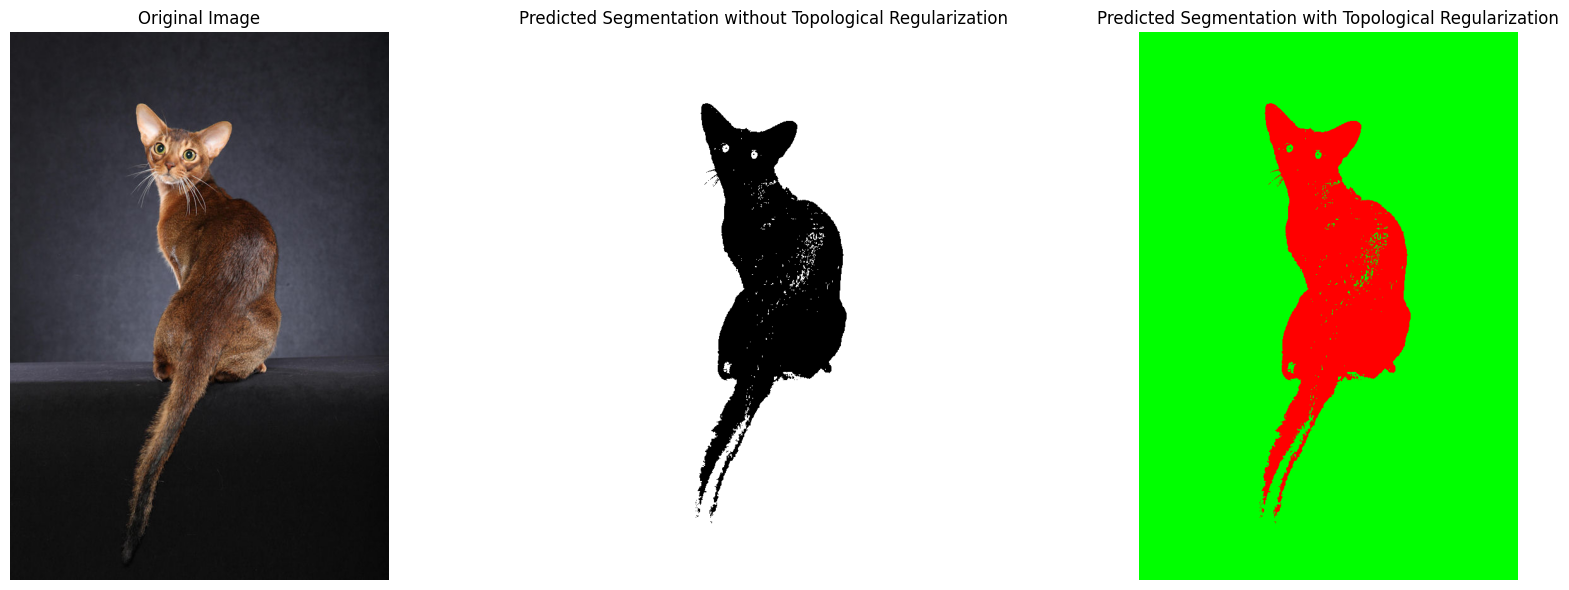

In [70]:
import matplotlib.pyplot as plt

# Predict on the entire image without topological regularization
y_pred_full_without_topo = rf_model.predict(X)

# Reshape the predictions back to the original image shape
predicted_segmentation_without_topo = y_pred_full_without_topo.reshape(annotations_array.shape)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Display the original image
axes[0].imshow(original_image)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Display the predicted segmentation without topological regularization
axes[1].imshow(predicted_segmentation_without_topo, cmap='gray')
axes[1].set_title('Predicted Segmentation without Topological Regularization')
axes[1].axis('off')

# Display the predicted segmentation with topological regularization
axes[2].imshow(segmentation_rgb)
axes[2].set_title('Predicted Segmentation with Topological Regularization')
axes[2].axis('off')

plt.tight_layout()
plt.show()
